In [6]:
import time
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm
from datetime import datetime
from urllib.parse import quote_plus
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib.font_manager as font_manager

In [8]:
def crawl_naver_news(keywords, start_date, end_date):
    news_data = []
    base_url = "https://search.naver.com/search.naver"
    date_format = "%Y.%m.%d"
    
    for keyword in tqdm(keywords, desc="키워드별 진행"):
        current_start_date = start_date
        total_days = (end_date - start_date).days + 1
        for _ in tqdm(range(total_days), desc=f"{keyword} 뉴스 크롤링"):
            params = {
                'where': 'news',
                'query': keyword,
                'sm': 'tab_opt',
                'sort': '0',
                'photo': '0',
                'field': '0',
                'reporter_article': '',
                'pd': '3',
                'ds': current_start_date.strftime(date_format),
                'de': current_start_date.strftime(date_format),
                'docid': '',
                'nso': 'so:r,p:from{}to{},a:all'.format(current_start_date.strftime("%Y%m%d"), current_start_date.strftime("%Y%m%d")),
                'start': 1,
            }
            
            response = requests.get(base_url, params=params)
            soup = BeautifulSoup(response.text, 'html.parser')
            news_items = soup.select('a.news_tit')
            
            for item in news_items:
                title = item.get('title')
                url = item.get('href')
                news_data.append({'keyword': keyword, 'title': title, 'url': url})

            time.sleep(3)
            current_start_date += pd.Timedelta(days=1)  # 다음 날짜로 이동

    return pd.DataFrame(news_data)

keywords = ["경제", "금융", "외국인", "기관", "개인", "삼성전자", "개미"]
start_date = pd.to_datetime("2021-01-01")
end_date = pd.to_datetime("2021-12-31")
df_news = crawl_naver_news(keywords, start_date, end_date)
print(df_news)

키워드별 진행: 100%|██████████| 7/7 [2:15:38<00:00, 1162.68s/it]

     keyword                                            title  \
0         경제             새해는 좋아지나…"세계 경제성장률 5.2% 전망, 한국 3.2%"   
1         경제                    문 대통령 “방역·경제·한반도 평화 선도해 나갈 것”   
2         경제              중국 백신 몰래 맞는 일본 부자들... 스가 경제 브레인도 접종   
3         경제       작년 이어 올해도···산업장관 새해 다짐은 “수출 플러스 전환” [뒷북경제]   
4         경제                   2021 경제전망…“수출 급반등 예상 속 K자형 우려”   
...      ...                                              ...   
9815      개미                     테슬라·스팩은 시들…하반기 서학개미가 꽂힌 종목은?   
9816      개미                   두산인프라코어, 개미 거센 반발에도 무상감자·유증 추진   
9817      개미                        초기 수익 단맛에 ‘증시 지옥’ 빠지는 개미들   
9818      개미  [한눈에 읽는 신간]매매방 입실기 ‘개미는 왜 실패에도 불구하고 계속 투자하는가?’외   
9819      개미                  주가 38% 빠졌는데도...서학개미들 "아이 러브 쿠팡"   

                                                    url  
0          http://yna.kr/AKR20201231113700009?did=1195m  
1     http://www.segye.com/content/html/2021/01/01/2...  
2     https://www.chosun.com/international/ja

In [9]:
# 데이터프레임을 CSV 파일로 저장
df_news.to_csv('/home/verlo/dev_ws/EDA/src/project1/data1/2021_naver_news.csv', index=False, encoding='utf-8-sig')

In [10]:
# CSV 파일 불러오기
df = pd.read_csv('/home/verlo/dev_ws/EDA/src/project1/data1/2021_naver_news.csv', encoding='utf-8-sig')
df

,keyword,title,url
0,경제,"새해는 좋아지나…""세계 경제성장률 5.2% 전망, 한국 3.2%""",http://yna.kr/AKR20201231113700009?did=1195m
1,경제,문 대통령 “방역·경제·한반도 평화 선도해 나갈 것”,http://www.segye.com/content/html/2021/01/01/2...
2,경제,중국 백신 몰래 맞는 일본 부자들... 스가 경제 브레인도 접종,https://www.chosun.com/international/japan/202...
3,경제,작년 이어 올해도···산업장관 새해 다짐은 “수출 플러스 전환” [뒷북경제],https://www.sedaily.com/NewsView/22H35POJBE
4,경제,2021 경제전망…“수출 급반등 예상 속 K자형 우려”,http://news.kbs.co.kr/news/view.do?ncd=5085552...
...,...,...,...
9815,개미,테슬라·스팩은 시들…하반기 서학개미가 꽂힌 종목은?,http://www.edaily.co.kr/news/newspath.asp?news...
9816,개미,"두산인프라코어, 개미 거센 반발에도 무상감자·유증 추진",http://www.newsway.co.kr/news/view?tp=1&ud=202...
9817,개미,초기 수익 단맛에 ‘증시 지옥’ 빠지는 개미들,http://www.munhwa.com/news/view.html?no=202109...
9818,개미,[한눈에 읽는 신간]매매방 입실기 ‘개미는 왜 실패에도 불구하고 계속 투자하는가?’외,http://news.heraldcorp.com/view.php?ud=2021091...


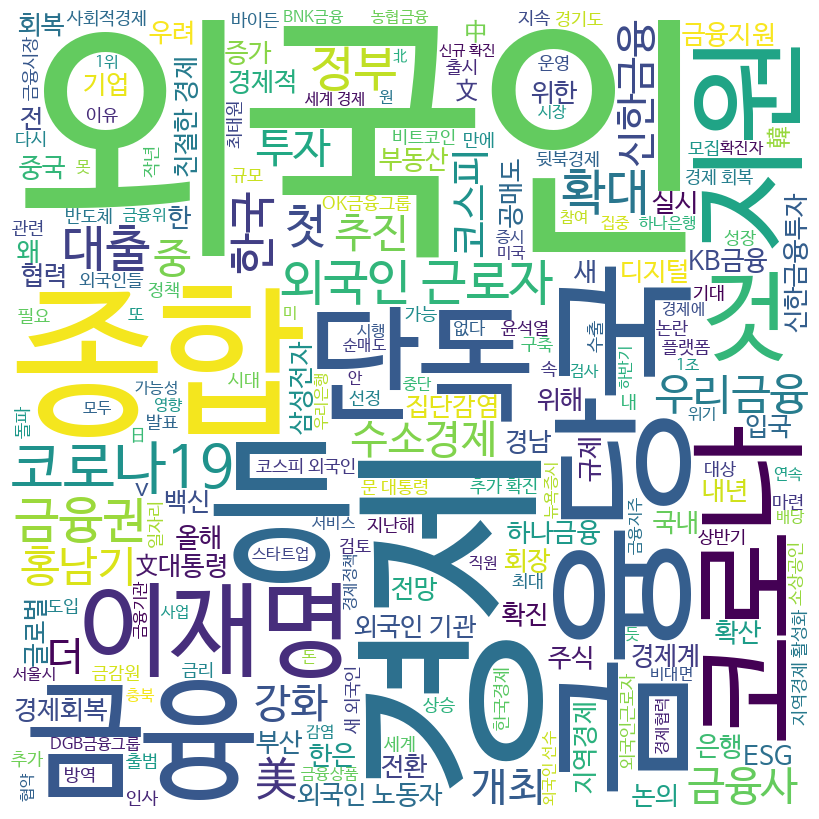

In [11]:
# CSV 파일 읽기
df = pd.read_csv('/home/verlo/dev_ws/EDA/src/project1/data1/2021_naver_news.csv', encoding='utf-8-sig')

# 워드 클라우드를 생성할 열 선택
text = ' '.join(df['title'].dropna())  # 'your_column'을 실제 열 이름으로 변경하세요.

# 한글 폰트 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"  # 사용하고자 하는 한글 폰트 경로로 변경하세요.
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 워드 클라우드 생성
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10, font_path=font_path).generate(text)

# 워드 클라우드 시각화
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()